## Gradient Boosting - CatBoost.ipynb

Dados em treino e teste (40% treino, 60% teste)


In [ ]:
!pip install catboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


# 2. Carregar a base de dados Iris a partir do CSV
df = pd.read_csv("Iris.csv")

df = df.drop("Id", axis=1)

# Definir X (features) e y (rótulos)
X = df.drop("Species", axis=1)
y = df["Species"]

print("Exemplo de dados:")
print(X.head())
print("Classes únicas:", y.unique())


Exemplo de dados:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Classes únicas: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir os dados em treino e teste (40% treino, 60% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.6, random_state=42, stratify=y_encoded
)

# 5. Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=100, # número de árvores (iterações)
    learning_rate=0.1, # taxa de aprendizado
    depth=3,  # profundidade máxima das árvores
    loss_function='MultiClass', # métrica de avaliação
    verbose=0 # desativar a exibição de logs durante o treinamento do modelo
)

# 6. Treinar o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar o modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        30
Iris-versicolor       0.90      0.93      0.92        30
 Iris-virginica       0.93      0.90      0.92        30

       accuracy                           0.94        90
      macro avg       0.94      0.94      0.94        90
   weighted avg       0.94      0.94      0.94        90



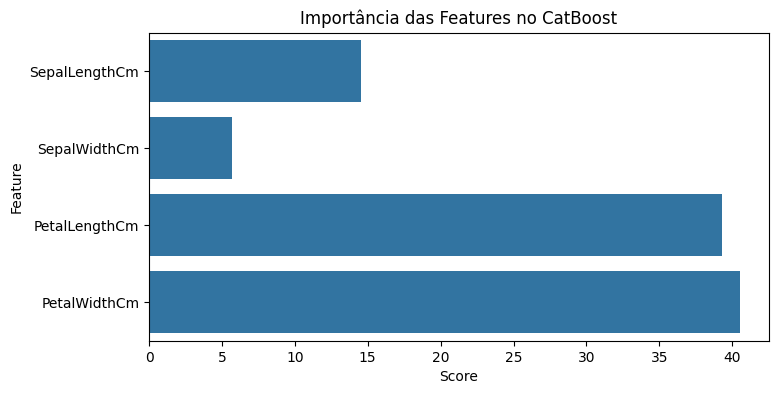

In [ ]:
# 9. Importância das Features
importances = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Features no CatBoost")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

Dados em treino e teste (80% treino, 20% teste)


Exemplo de dados:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Classes únicas: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



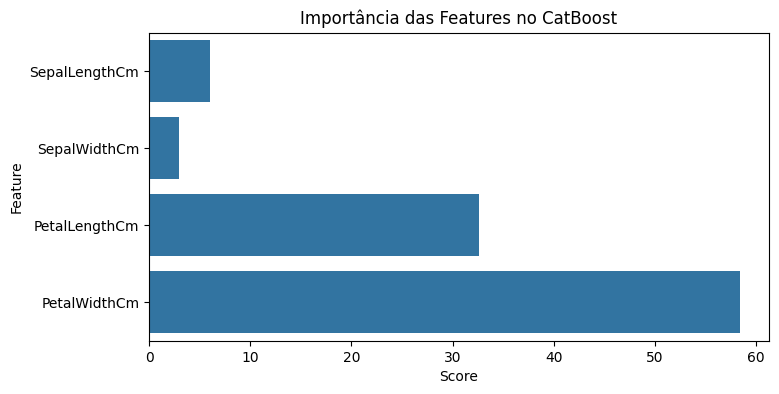

In [ ]:
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregar a base de dados Iris a partir do CSV
df = pd.read_csv("Iris.csv")

df = df.drop("Id", axis=1)

# Definir X (features) e y (rótulos)
X = df.drop("Species", axis=1)
y = df["Species"]

print("Exemplo de dados:")
print(X.head())
print("Classes únicas:", y.unique())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=100, # número de árvores (iterações)
    learning_rate=0.1, # taxa de aprendizado
    depth=3,  # profundidade máxima das árvores
    loss_function='MultiClass', # métrica de avaliação
    verbose=0 # desativar a exibição de logs durante o treinamento do modelo
)

# 6. Treinar o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar o modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9. Importância das Features
importances = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Features no CatBoost")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

Dados em treino e teste (50% treino, 50% teste)


Exemplo de dados:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Classes únicas: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.83      0.96      0.89        25
 Iris-virginica       0.95      0.80      0.87        25

       accuracy                           0.92        75
      macro avg       0.93      0.92      0.92        75
   weighted avg       0.93      0.92      0.92        75



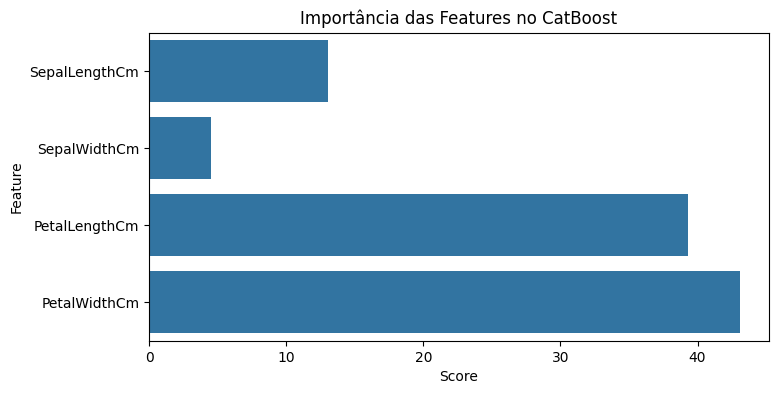

In [ ]:
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregar a base de dados Iris a partir do CSV
df = pd.read_csv("Iris.csv")

df = df.drop("Id", axis=1)

# Definir X (features) e y (rótulos)
X = df.drop("Species", axis=1)
y = df["Species"]

print("Exemplo de dados:")
print(X.head())
print("Classes únicas:", y.unique())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir os dados em treino e teste (50% treino, 50% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.5, random_state=42, stratify=y_encoded
)

# 5. Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=100, # número de árvores (iterações)
    learning_rate=0.1, # taxa de aprendizado
    depth=3,  # profundidade máxima das árvores
    loss_function='MultiClass', # métrica de avaliação
    verbose=0 # desativar a exibição de logs durante o treinamento do modelo
)

# 6. Treinar o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar o modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9. Importância das Features
importances = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Features no CatBoost")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

Teste com setosa e versicolor - Dados em treino e teste (40% treino, 60% teste)




Relatório de Classificação:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        30
  Versicolor       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



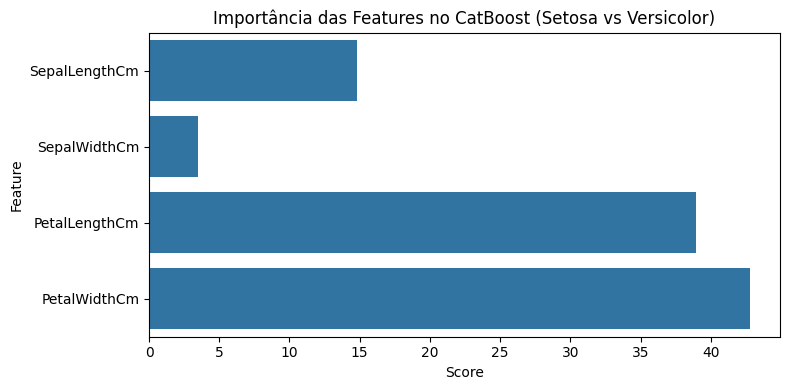

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar a base de dados Iris
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)

# 2. Definir X (features) e y (rótulos)
X = df.drop("Species", axis=1)
y = df["Species"]

# 3. Filtrar apenas Setosa e Versicolor
mask = (y == "Iris-setosa") | (y == "Iris-versicolor")
X_filtered = X[mask]
y_filtered = y[mask]

# 4. Codificar rótulos: Setosa = 0, Versicolor = 1
y_filtered = np.where(y_filtered == "Iris-setosa", 0, 1)

# 5. Dividir os dados em treino e teste (40% treino, 60% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.6, random_state=42, stratify=y_filtered
)

# 6. Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    loss_function='Logloss',  # para classificação binária
    verbose=0
)

# 7. Treinar o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 8. Fazer previsões
y_pred = model.predict(X_test)

# 9. Avaliar o modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor"]))

# 10. Importância das Features
importances = model.get_feature_importance()
feature_names = X_filtered.columns  # usar apenas as features dos dados filtrados

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Features no CatBoost (Setosa vs Versicolor)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Teste com setosa e versicolor - Dados em treino e teste (70% treino, 30% teste)



Relatório de Classificação:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



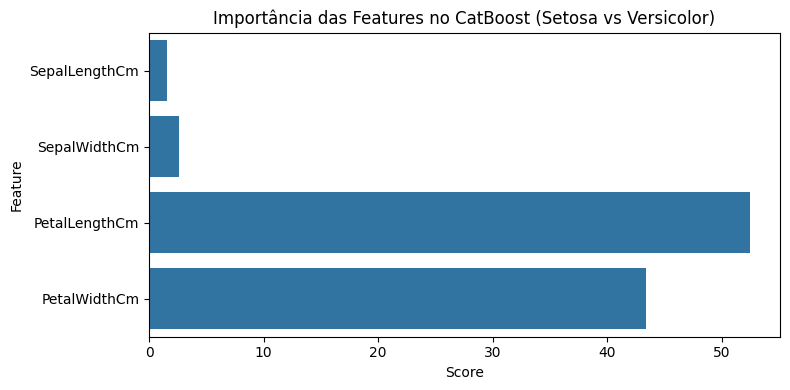

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar a base de dados Iris
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)

# 2. Definir X (features) e y (rótulos)
X = df.drop("Species", axis=1)
y = df["Species"]

# 3. Filtrar apenas Setosa e Versicolor
mask = (y == "Iris-setosa") | (y == "Iris-versicolor")
X_filtered = X[mask]
y_filtered = y[mask]

# 4. Codificar rótulos: Setosa = 0, Versicolor = 1
y_filtered = np.where(y_filtered == "Iris-setosa", 0, 1)

# 5. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered
)

# 6. Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    loss_function='Logloss',  # para classificação binária
    verbose=0
)

# 7. Treinar o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 8. Fazer previsões
y_pred = model.predict(X_test)

# 9. Avaliar o modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor"]))

# 10. Importância das Features
importances = model.get_feature_importance()
feature_names = X_filtered.columns  # usar apenas as features dos dados filtrados

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Features no CatBoost (Setosa vs Versicolor)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
